In [1]:
from strategiesavg import *
from data import *
import matplotlib.pyplot as plt

In [2]:
# Raw
d0 = get_hf_data()
# Outliers
d1 = get_hf_data(filter_outliers=True)
# Scaling
d2 = get_hf_data(scaling='z-score')
d3 = get_hf_data(scaling='minmax')
# Outliers and scaling
d4 = get_hf_data(filter_outliers=True, scaling='z-score')
d5 = get_hf_data(filter_outliers=True, scaling='minmax')

# dfs = [d0,d1,d2,d3,d4,d5]
dfs = [d0,d1]
balancings = [None, 'undersample', 'oversample', 'smote']

100%|██████████| 180/180 [00:34<00:00,  5.28it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: None
Accuracy: 0.76
Params: (25, 0.1, 25)


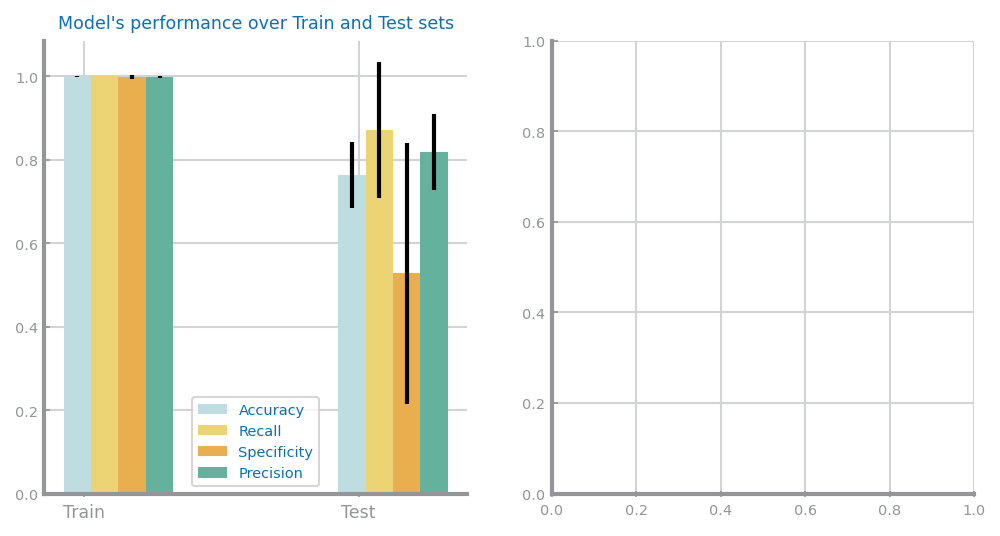

  2%|▏         | 4/180 [00:00<00:06, 26.53it/s]

Results: {'Accuracy': [0.999163179916318, 0.762316384180791], 'Recall': [1.0, 0.8708536585365854], 'Specificity': [0.9973684210526316, 0.5273684210526316], 'Precision': [0.998780487804878, 0.8182671957671958]}

------




100%|██████████| 180/180 [00:31<00:00,  5.69it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: undersample
Accuracy: 0.75
Params: (5, 0.1, 250)


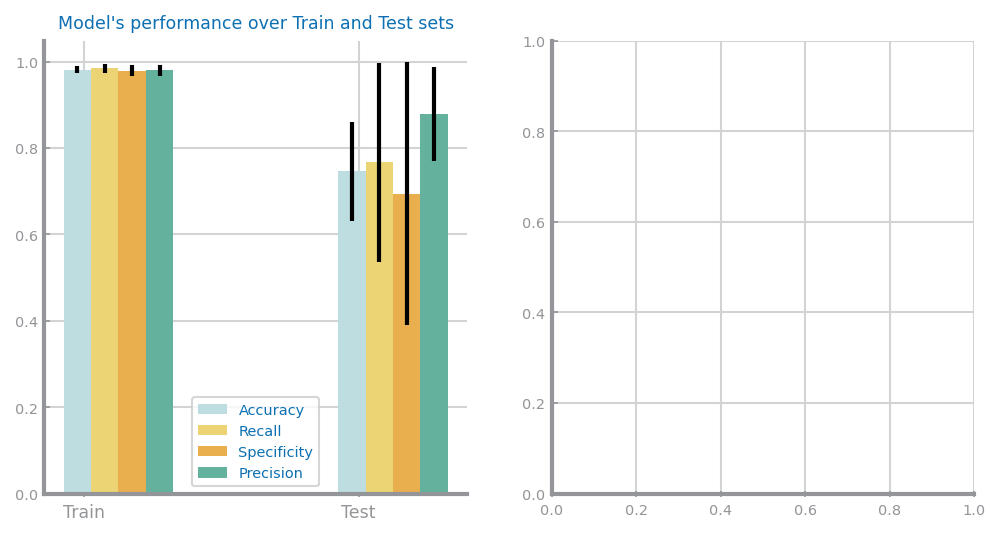

  2%|▏         | 4/180 [00:00<00:06, 26.75it/s]

Results: {'Accuracy': [0.981784005468216, 0.745819209039548], 'Recall': [0.9843472317156527, 0.7674390243902439], 'Specificity': [0.9792207792207792, 0.6947368421052631], 'Precision': [0.9795179504040263, 0.8784962406015038]}

------




100%|██████████| 180/180 [00:36<00:00,  4.99it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: oversample
Accuracy: 0.75
Params: (25, 1, 250)


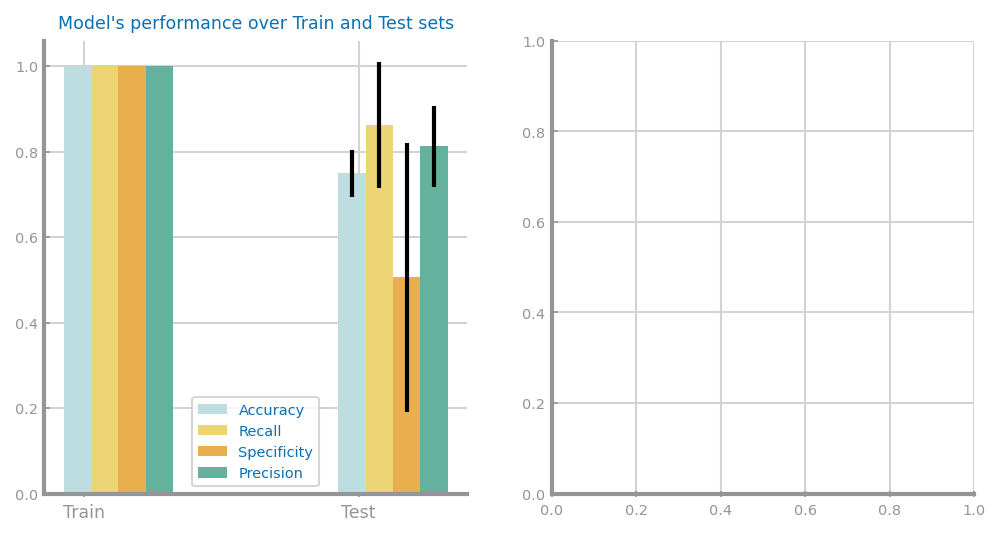

  0%|          | 0/180 [00:00<?, ?it/s]

Results: {'Accuracy': [1.0, 0.7489830508474576], 'Recall': [1.0, 0.8613414634146341], 'Specificity': [1.0, 0.5057894736842105], 'Precision': [1.0, 0.8121151836669078]}

------




100%|██████████| 180/180 [00:37<00:00,  4.82it/s]


max_depth, max_features, n_estimators
Index:  0 balancing: smote
Accuracy: 0.76
Params: (25, 1, 300)


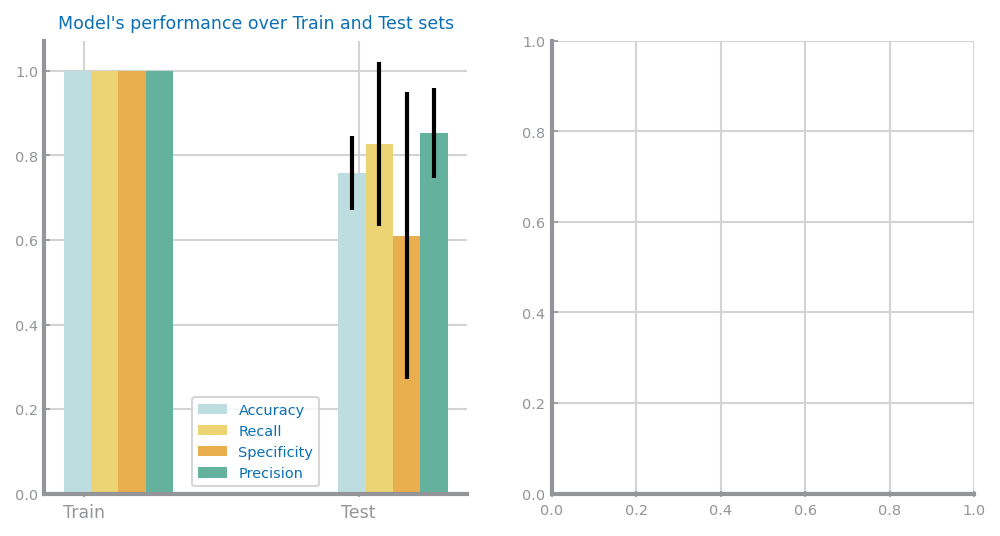

  2%|▏         | 4/180 [00:00<00:05, 31.08it/s]

Results: {'Accuracy': [1.0, 0.7589265536723164], 'Recall': [1.0, 0.8265853658536586], 'Specificity': [1.0, 0.6105263157894737], 'Precision': [1.0, 0.8527831528766063]}

------




100%|██████████| 180/180 [00:33<00:00,  5.43it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: None
Accuracy: 0.76
Params: (10, 1, 75)


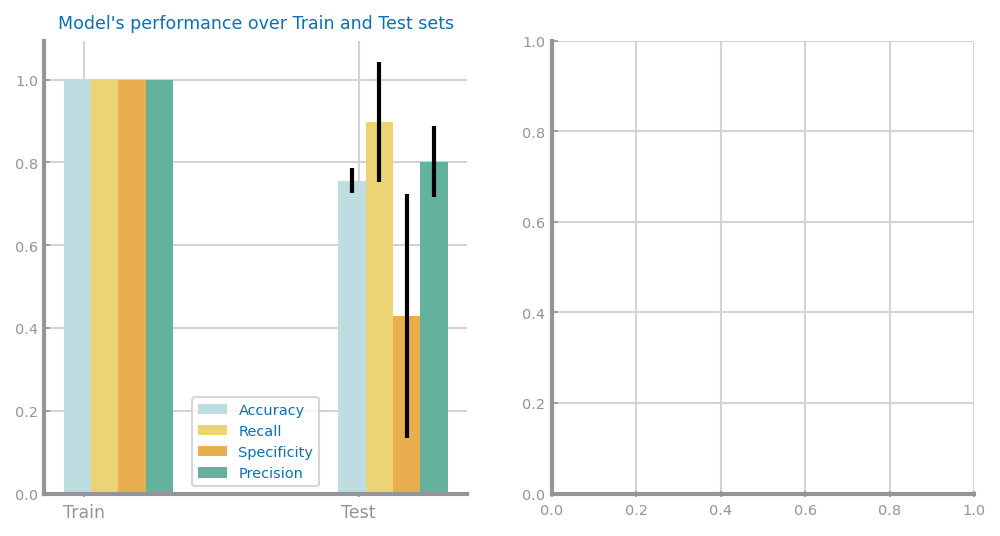

  2%|▏         | 4/180 [00:00<00:06, 27.18it/s]

Results: {'Accuracy': [1.0, 0.756140350877193], 'Recall': [1.0, 0.8976923076923077], 'Specificity': [1.0, 0.4294117647058824], 'Precision': [1.0, 0.8020808080808081]}

------




100%|██████████| 180/180 [00:30<00:00,  5.87it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: undersample
Accuracy: 0.76
Params: (5, 1, 10)


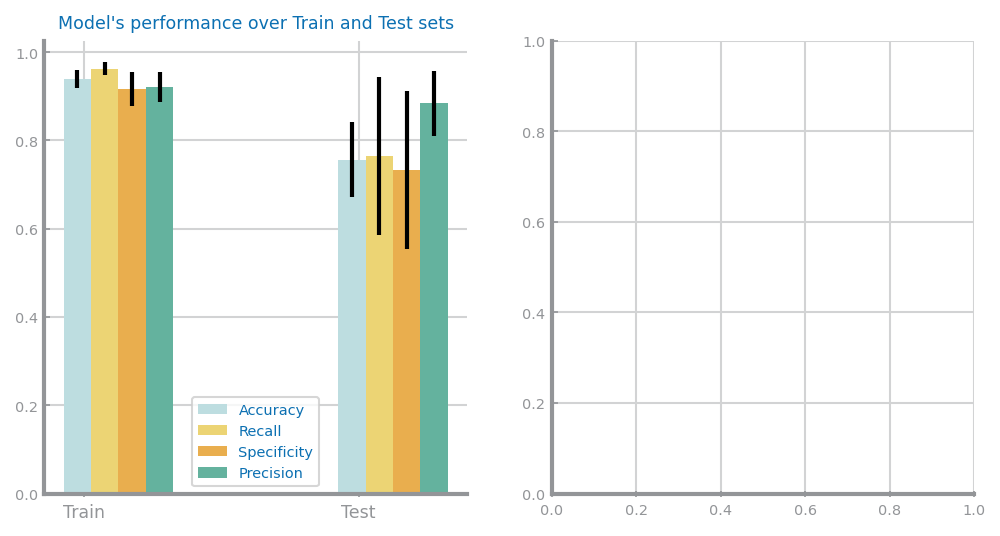

  2%|▏         | 4/180 [00:00<00:06, 27.70it/s]

Results: {'Accuracy': [0.9396273291925465, 0.756328320802005], 'Recall': [0.9626915113871636, 0.765], 'Specificity': [0.9165631469979296, 0.7333333333333333], 'Precision': [0.9215204678362573, 0.8843720346695175]}

------




100%|██████████| 180/180 [00:36<00:00,  4.92it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: oversample
Accuracy: 0.77
Params: (25, 1, 100)


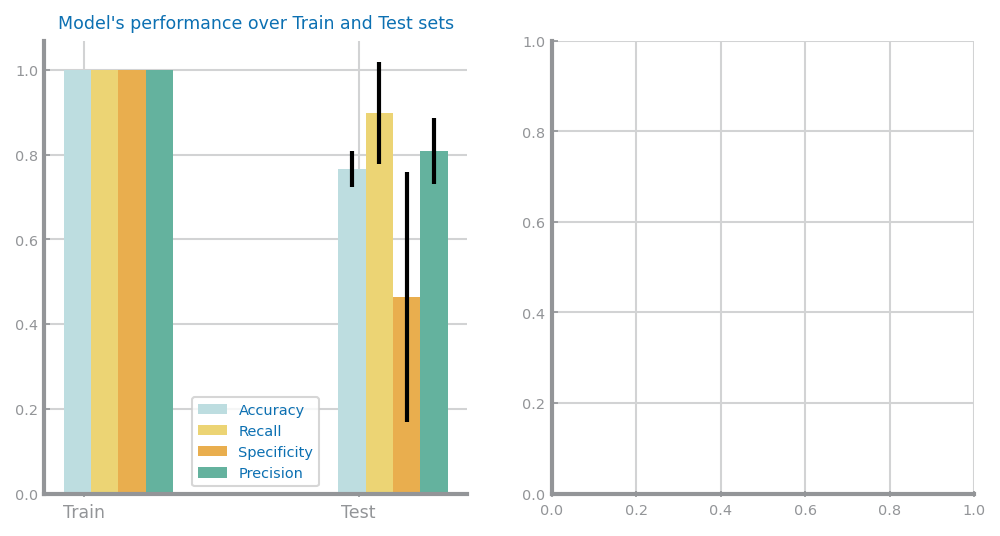

  2%|▏         | 4/180 [00:00<00:06, 27.53it/s]

Results: {'Accuracy': [1.0, 0.7665413533834586], 'Recall': [1.0, 0.8976923076923077], 'Specificity': [1.0, 0.4640522875816993], 'Precision': [1.0, 0.8089859103522524]}

------




100%|██████████| 180/180 [00:35<00:00,  5.07it/s]


max_depth, max_features, n_estimators
Index:  1 balancing: smote
Accuracy: 0.76
Params: (5, 1, 100)


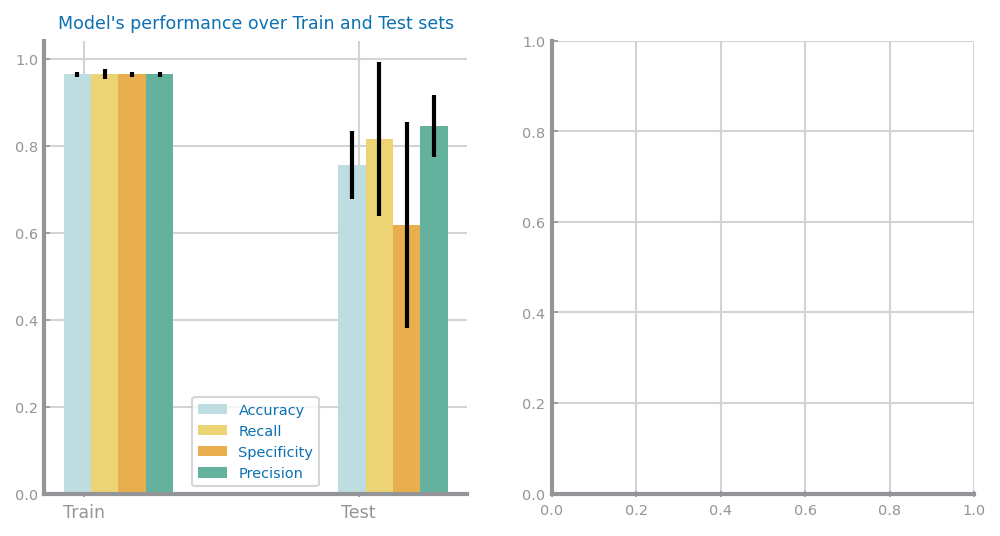

Results: {'Accuracy': [0.9649150743099788, 0.7563909774436091], 'Recall': [0.9655397680875388, 0.8158974358974359], 'Specificity': [0.9642903805324188, 0.6176470588235294], 'Precision': [0.964356558396233, 0.8456410256410256]}

------


('1,oversample', 0.7665413533834586)


In [3]:
best = ("", 0)

for i, df in enumerate(dfs):
    for bal in balancings:
        params, results = RandomForestsKFold(df, "DEATH_EVENT", balancing=bal)
        accuracy = results["Accuracy"][1]
        print("Index: ", i, "balancing:", bal)
        print(f'Accuracy: {accuracy:.2f}')
        print(f'Params: {params}')
        plt.pause(0.1)
        print("Results:", results)
        print("\n------\n\n")
        if (accuracy > best[1]):
            if bal == None: bal = "None"
            best = (str(i) + "," + bal, accuracy)
            
print(best)